Read preprocessed data

In [34]:
import pickle
# to read the pkl file:
with open('data/preprocessing_output.pkl', 'rb') as file:
    loaded_list = pickle.load(file)
    
# Print the dictionary
print(loaded_list)

[['binance', 'towel', 'come', 'everywhere', 'include', 'breakfast', 'cooking'], ['drop', 'sol', 'address', 'make', 'sure', 'follow', 'dont', 'ask', 'backhand', 'index', 'point', 'medium', 'light', 'skin', 'tone'], ['take', 'one', 'good', 'altcoin', 'change', 'world', 'sparkle'], ['disrespectful', 'one', 'top', '3', 'favorite'], ['congressional', 'republican', 'call', 'affordable', 'connectivity', 'program', 'wasteful', 'call', 'necessary', 'time', 'congress', 'extend', '23', 'million', 'household', 'across', 'america', 'rely', 'program', 'stay', 'connect'], ['donald', 'trump', 'wont', 'american', 'president', 'must', 'refuse', 'denounce', 'political', 'violence', 'ill', 'say', 'trump', 'wont', 'political', 'violence', 'never', 'ever', 'acceptable', 'america'], ['massive', 'bitcoin', 'breakout', 'come', 'ready'], ['ok', 'vote', 'ill', '25', 'ticket', 'giveaway', 'station', 'head', '10', 'min', 'feel', 'like', 'ill', 'come', 'space', 'give', 'another', '5', '10', 'generous', 'queen', 'pr

In [35]:
import pandas as pd

labels = pd.read_pickle('data/labels.pkl')
print(labels)

0      1
1      1
2      2
3      2
4      1
      ..
834    1
835    0
836    2
837    2
838    0
Name: label, Length: 839, dtype: int64


In [36]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
print(len(loaded_list))
documents = [" ".join(doc) for doc in loaded_list]

839


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [39]:
data = pd.DataFrame({
    'text': documents,
    'label': labels
})
print(data)

                                                  text  label
0    binance towel come everywhere include breakfas...      1
1    drop sol address make sure follow dont ask bac...      1
2           take one good altcoin change world sparkle      2
3                     disrespectful one top 3 favorite      2
4    congressional republican call affordable conne...      1
..                                                 ...    ...
834  ultimate guide festival celebrate latin music ...      1
835                       lady gaga fucking movie star      0
836  te har salir volando como un cohete rocket col...      2
837  youre invite see rogueport may 23 papermarioth...      2
838                                       alien mother      0

[839 rows x 2 columns]


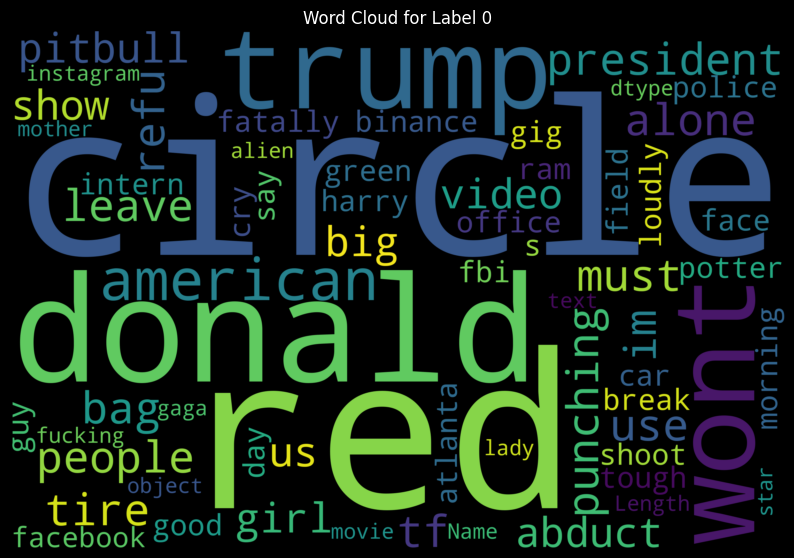

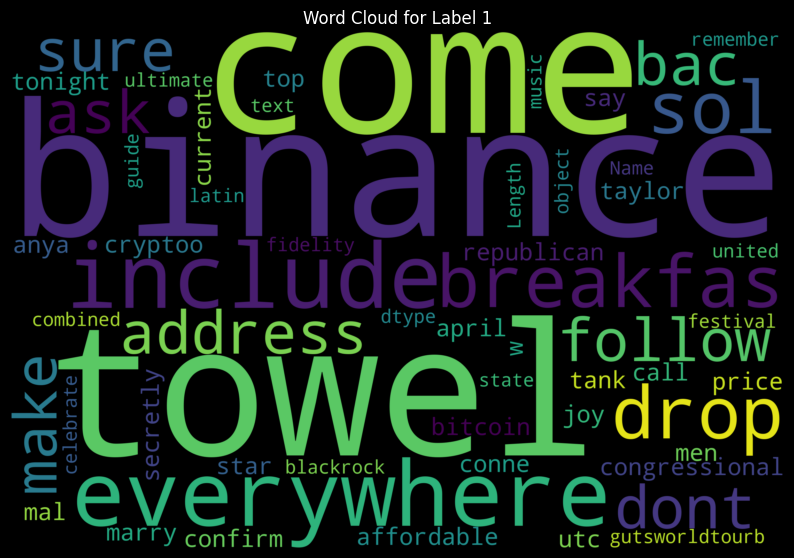

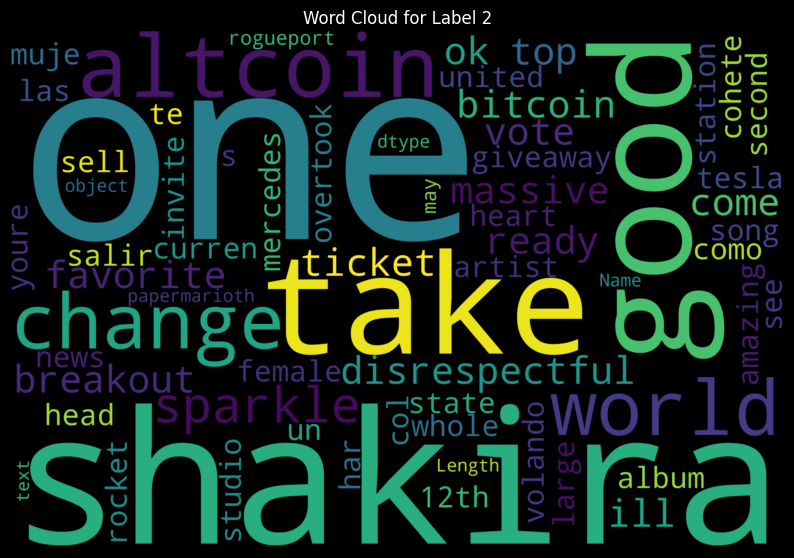

In [40]:
for label in sorted(data['label'].unique()):
    # select only texts from a specific label
    text = data[data['label'] == label]['text']

    # create the wordcloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text))

    # visualize the wordcloud
    fig = plt.figure(
        figsize = (10, 8),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(f'Word Cloud for Label {label}', color='white')
    plt.axis('off')
    #plt.tight_layout(pad=0)
    plt.show()

TD-IDF

split train and test dataset

In [41]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size = 0.2, random_state = 42)

tf-idf matrix

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vectorizer = TfidfVectorizer()
tfidf_matrix_train = vectorizer.fit_transform(X_train)
tfidf_matrix_test = vectorizer.transform(X_test)
print(tfidf_matrix_train)

  (0, 288)	0.37250219779291666
  (0, 2003)	0.3346270858732312
  (0, 1261)	0.23449073678596027
  (0, 1186)	0.21306868044902347
  (0, 1851)	0.2967519739535457
  (0, 933)	0.1944725173965879
  (0, 2758)	0.37250219779291666
  (0, 791)	0.37250219779291666
  (0, 2489)	0.3503466776092838
  (0, 307)	0.3503466776092838
  (1, 2050)	0.6017449021898648
  (1, 731)	0.5659545863075479
  (1, 1829)	0.3984962226458127
  (1, 1395)	0.3984962226458127
  (2, 1695)	0.427856938567264
  (2, 1511)	0.29354166402363363
  (2, 2235)	0.32684506390804846
  (2, 1061)	0.34923077040400946
  (2, 1062)	0.3103785037551525
  (2, 1186)	0.48946241853942346
  (2, 1851)	0.3408500455617201
  (2, 933)	0.2233716107496086
  (3, 620)	0.27548363383663
  (3, 170)	0.2156824053883861
  (3, 1078)	0.22118118289947156
  :	:
  (668, 1706)	0.336510799382073
  (668, 2663)	0.336510799382073
  (668, 578)	0.336510799382073
  (668, 217)	0.32141200519011487
  (668, 2386)	0.3001314500023342
  (668, 1401)	0.3001314500023342
  (668, 2513)	0.2920409584

In [43]:
labels.value_counts()

label
1    433
2    236
0    170
Name: count, dtype: int64

train data

In [44]:
model = SVC(kernel='linear')
model.fit(tfidf_matrix_train, y_train)

SVC(kernel='linear')

predict data

In [45]:
y_pred = model.predict(tfidf_matrix_test)

accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.6547619047619048


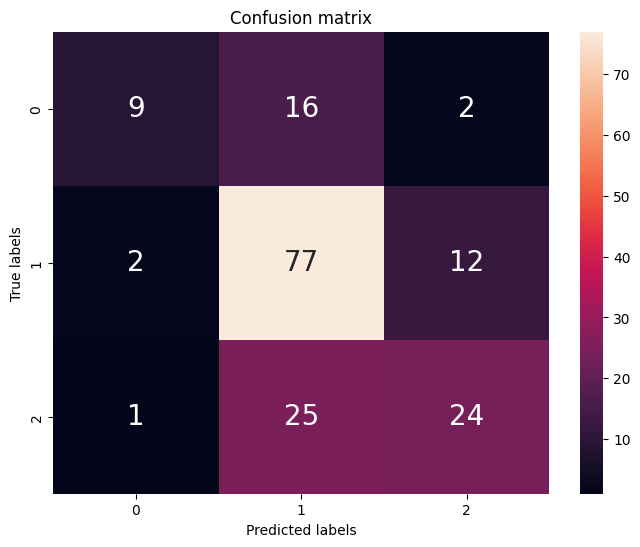

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, annot_kws={"size": 20})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [47]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.33      0.46        27
           1       0.65      0.85      0.74        91
           2       0.63      0.48      0.55        50

    accuracy                           0.65       168
   macro avg       0.68      0.55      0.58       168
weighted avg       0.66      0.65      0.64       168

